In [1]:
import pandas as pd
import seaborn as sns
import pycaret as pyc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss # use as custom input
from pycaret.classification import *


le = LabelEncoder()

CLASSIFICATION_TARGET = 'h1n1_vaccine'

data = pd.read_csv('../../data/training_set_features.csv')
target = pd.read_csv('../../data/training_set_labels.csv')[CLASSIFICATION_TARGET]
df = data.join(target, how='inner')
# train, test = train_test_split(df, shuffle=False)

df = df.astype('category')
for col in df:
    df[col] = df[col].cat.codes

### Fitting PyCaret models

In [2]:
clf = setup(data=df, target='h1n1_vaccine',session_id=123, normalize=True, fix_imbalance=True, html=True, feature_selection=True,
            remove_outliers=True, remove_multicollinearity=True, remove_perfect_collinearity=True, multicollinearity_threshold=0.8,
           log_profile=True, fold_strategy='stratifiedkfold')

add_metric('logloss', 'LogLoss', log_loss, greater_is_better=False)

,Description,Value
0,session_id,123
1,Target,h1n1_vaccine
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(26707, 37)"
5,Missing Values,False
6,Numeric Features,36
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


Name                                                        LogLoss
Display Name                                                LogLoss
Score Function                <function log_loss at 0x7fa4bd4bae18>
Scorer               make_scorer(log_loss, greater_is_better=False)
Target                                                         pred
Args                                                             {}
Greater is Better                                             False
Multiclass                                                     True
Custom                                                         True
Name: logloss, dtype: object

In [3]:
top10 = compare_models(n_select = 10, sort='AUC') 
# tune top 5 base models
tuned_top10 = [tune_model(i, optimize='LogLoss') for i in top10]
# ensemble top 5 tuned models
#bagged_top5 = [ensemble_model(i) for i in tuned_top5]
# blend top 5 base models 
#blender = blend_models(estimator_list = top5) 
# select best model 
best = automl(optimize = 'LogLoss')
 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.6729,0.7727,0.6966,0.7916,0.7030,0.2835,0.3226,11.2992
1,0.6717,0.7448,0.6759,0.7775,0.7012,0.2608,0.2908,11.3381
2,0.6988,0.7656,0.7042,0.7935,0.7250,0.3090,0.3400,10.4046
3,0.6943,0.7549,0.6984,0.7901,0.7209,0.2997,0.3301,10.5602
4,0.6762,0.7431,0.6850,0.7828,0.7053,0.2738,0.3058,11.1825
5,0.6560,0.7644,0.6792,0.7813,0.6878,0.2557,0.2935,11.8827
6,0.6943,0.7765,0.7093,0.7974,0.7215,0.3111,0.3465,10.5602
7,0.6745,0.7618,0.6909,0.7871,0.7041,0.2790,0.3145,11.2409
8,0.6926,0.7791,0.7112,0.7990,0.7202,0.3119,0.3490,10.6185
9,0.6552,0.7156,0.6414,0.7561,0.6856,0.2127,0.2350,11.9088


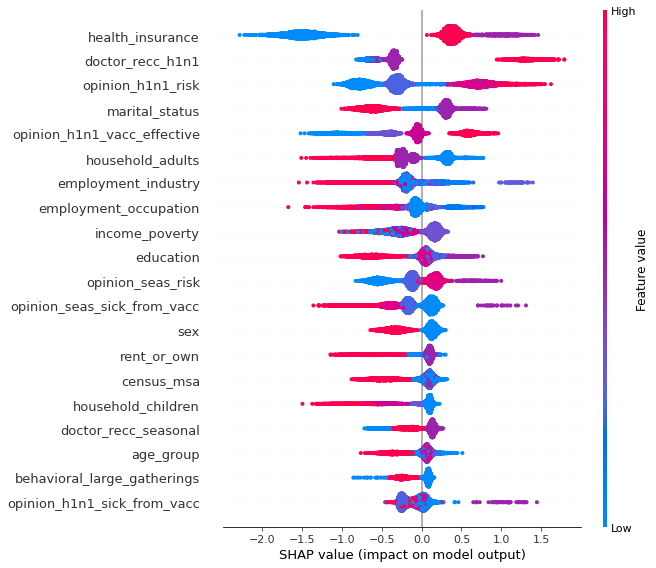

In [4]:
interpret_model(best)

In [5]:
evaluate_model(best)

,Parameters
nan_mode,Min
eval_metric,Logloss
iterations,1000
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


In [6]:
best